In [7]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [2]:
class Estrattore:
  def __init__(self, data: DataFrame, categoria: str):
    self.categoria = categoria
    self.data = data.dropna()
  
  def get_categoria(self):
     return self.categoria
  
  def get_nomi_regioni(self):
    return self.data["Regione"].unique()
  
  def get_anni(self):
     return self.data["Anno"].unique()
  
  def get_valori(self, regione: str, anno: int) -> Tuple[int, int]:
        df_filtered = self.data[(self.data['Regione'] == regione) & (self.data['Anno'] == anno)]
        if not df_filtered.empty:
            numero_clienti = df_filtered['Arrivi'].values[0]
            numero_notti = df_filtered['Presenze'].values[0]
            return numero_clienti, numero_notti
        return 0, 0
  
  # Funzione per creare il grafico
  def crea_grafico_plot_list(self, regioni: str | list[str]):
    if type(regioni) == str:
        regioni = [regioni]

    plt.figure(figsize=(10, 5))
    anni = self.get_anni()

    for regione in regioni:
      arrivi = [self.get_valori(regione, anno)[0] for anno in anni]
      presenze = [self.get_valori(regione, anno)[1] for anno in anni]
      plt.plot(anni, arrivi, marker='o', label='Arrivi ' + regione)
      plt.plot(anni, presenze, marker='o', label='Presenze ' + regione)

    plt.title(f'{self.get_categoria()} in {", ".join(regioni)}')
    plt.xlabel('Anno')
    plt.ylabel('Numero')
    plt.legend()
    plt.grid(True)
    plt.show() 

In [3]:
# URL dei csv
URL_DATA = [
    "https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-negli-agriturismi-in-Italia-per-regione.csv",
    "https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione.csv",
    "https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv",
    "https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-negli-agriturismi-in-Italia-per-regione.csv",
    "https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione.csv",
    "https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv"
]

In [4]:
# Caricamento dei dataset
df_arrivi_agriturismi = pd.read_csv(URL_DATA[0], delimiter=';')
df_presenze_agriturismi = pd.read_csv(URL_DATA[3], delimiter=';')
df_arrivi_alberghi = pd.read_csv(URL_DATA[1], delimiter=';')
df_presenze_alberghi = pd.read_csv(URL_DATA[4], delimiter=';')
df_arrivi_campeggi = pd.read_csv(URL_DATA[2], delimiter=';')
df_presenze_campeggi = pd.read_csv(URL_DATA[5], delimiter=';')

# Merge dei dataset per categorie
df_agriturismi = pd.merge(df_arrivi_agriturismi, df_presenze_agriturismi, on=['Regione', 'Anno'], how='inner')
df_alberghi = pd.merge(df_arrivi_alberghi, df_presenze_alberghi, on=['Regione', 'Anno'], how='inner')
df_campeggi = pd.merge(df_arrivi_campeggi, df_presenze_campeggi, on=['Regione', 'Anno'], how='inner')

In [5]:
# Creazione degli oggetti
e_agriturismi = Estrattore(df_agriturismi, "Agriturismi")
e_campeggi = Estrattore(df_campeggi, "Campeggi")
e_alberghi = Estrattore(df_alberghi, "Alberghi")

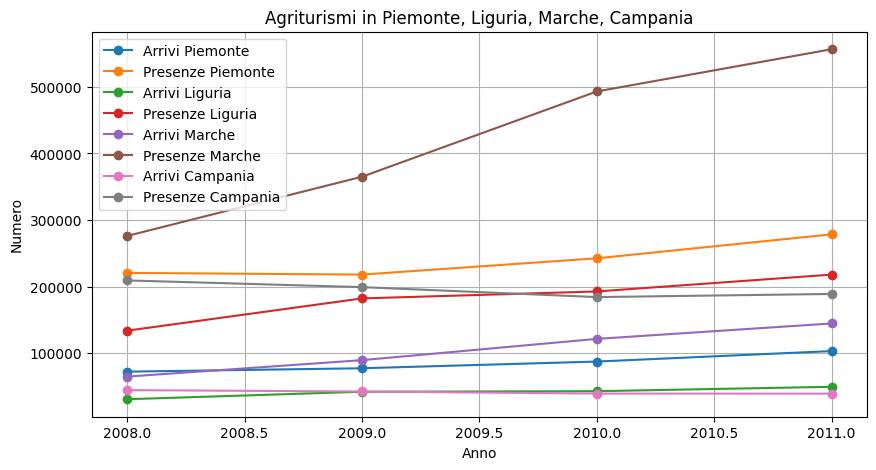

In [6]:
e_agriturismi.crea_grafico_plot_list(['Piemonte', 'Liguria', 'Marche', 'Campania'])